In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
# import folium

In [2]:
data = pd.read_csv('data/houses/houses_current.csv')
data.head()
len(data)

9674

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9674 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  9674 non-null   object 
 1   area        9497 non-null   float64
 2   num_floors  7706 non-null   float64
 3   bedrooms    7577 non-null   float64
 4   address     9674 non-null   object 
 5   price       9548 non-null   float64
 6   url         9674 non-null   object 
dtypes: float64(4), object(3)
memory usage: 529.2+ KB


REMOVE DUPLICATES

In [4]:
print('Sum of duplicates: ', data.duplicated(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).sum())
data = data.drop_duplicates(subset=['houseTypes', 'area', 'num_floors', 'bedrooms','address','price']).copy()
print('After removing duplicates: ', data.duplicated().sum())
print('Length of data then: ', len(data))

Sum of duplicates:  1066
After removing duplicates:  0
Length of data then:  8608


CONVERT OBJECT TO FLOAT64 AND STRING

In [5]:
data = data.astype({'houseTypes':'string','address':'string','url':'string'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   houseTypes  8608 non-null   string 
 1   area        8447 non-null   float64
 2   num_floors  6798 non-null   float64
 3   bedrooms    6698 non-null   float64
 4   address     8608 non-null   string 
 5   price       8492 non-null   float64
 6   url         8608 non-null   string 
dtypes: float64(4), string(3)
memory usage: 538.0 KB


In [7]:
for col in data.columns:
    print('Ratio of missing data of ' + str(col) +': ' + str(round(data[col].isna().sum()*100/len(data[col]),3)) + '%')

Ratio of missing data of houseTypes: 0.0%
Ratio of missing data of area: 1.87%
Ratio of missing data of num_floors: 21.027%
Ratio of missing data of bedrooms: 22.189%
Ratio of missing data of address: 0.0%
Ratio of missing data of price: 1.348%
Ratio of missing data of url: 0.0%


In [8]:
data[['district','city']] = data['address'].apply(lambda x: pd.Series(str(x).split(', ')))


In [9]:
data = data.drop(['address'], axis=True)

In [10]:
data.reset_index(inplace=True, drop=True)

In [11]:
data = data[['houseTypes','area','num_floors','bedrooms','district','city','price','url']]

In [12]:
data.head()

,houseTypes,area,num_floors,bedrooms,district,city,price,url
0,Bán Nhà riêng,130.0,3.0,7.0,Quận 12,TP Hồ Chí Minh,9.200,https://batdongsan.vn/ban-biet-thu-san-vuon-qu...
1,Bán Nhà riêng,65.0,NaN,2.0,Ngũ Hành Sơn,Đà Nẵng,2.900,https://batdongsan.vn/29-ty-dien-tich-6580m2-n...
2,Bán Nhà riêng,90.0,5.0,5.0,Hai Bà Trưng,Hà Nội,14.000,https://batdongsan.vn/ban-nha-kim-nguu-phan-lo...
3,Bán Nhà riêng,50.0,5.0,5.0,Quận 3,TP Hồ Chí Minh,0.001,https://batdongsan.vn/quan-3-le-van-sy-5-tang-...
4,Bán Nhà riêng,30.0,1.0,2.0,Gò Vấp,TP Hồ Chí Minh,3.700,https://batdongsan.vn/nha-moi-full-noi-that-hx...


In [13]:
data.to_csv('data/houses/houses.csv',index=False)
data.to_excel('data/houses/houses.xlsx',index=False)

## Xử lí giá

In [21]:
data.price.describe()

count     8492.000000
mean       179.531718
std       2044.588083
min          0.000000
25%          3.650000
50%          5.450000
75%          8.500000
max      89440.000000
Name: price, dtype: float64

In [14]:
low_noise_data = data.loc[(data['price'] < 0.1)]
hign_noise_data = data.loc[(data['price'] >= 500)]
null_price_data = data[data['price'].isna()]

In [ ]:
house_data_1 = data.loc[(data['price'] >= 0.1) & (data['price'] < 10)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_1['price'])

In [ ]:
house_data_2 = data.loc[(data['price'] >= 0.1) & (data['price'] < 50)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_2['price'])

In [15]:
house_data = data.loc[(data['price'] >= 0.1) & (data['price'] < 500)]

In [ ]:
#house_data.to_excel('house_data.xlsx', index=False)

In [ ]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['price'])

## Xử lí area

In [16]:
house_data['area'].isna().sum()

124

In [17]:
house_data['area'].describe()

count      8142.000000
mean         97.477207
std        1148.948237
min           3.000000
25%          43.000000
50%          58.000000
75%          84.000000
max      100103.000000
Name: area, dtype: float64

In [18]:
house_data = house_data.loc[(house_data['area'] >= 10) & (house_data['area'] <= 20000)]

In [19]:
house_data['area'].describe()

count     8096.000000
mean        85.640689
std        303.197151
min         10.000000
25%         44.000000
50%         59.000000
75%         85.000000
max      18264.000000
Name: area, dtype: float64

In [ ]:
house_data_3 = house_data.loc[(house_data['area'] >=10) & (house_data['area'] <=500)]
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data_3['area'])

In [20]:
house_data.to_excel('data/houses/house_data.xlsx', index=False)

# Xử lý num_floors và bedrooms

In [ ]:
house_data.isna().sum()

In [ ]:
house_data.loc[house_data['num_floors'] > 11, 'num_floors'] = None
house_data.isna().sum()

In [ ]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['num_floors'])

In [ ]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(house_data['bedrooms'])

In [ ]:
numeric_houses = pd.DataFrame({'area':house_data['area'],'num_floors':house_data['num_floors'],'bedrooms':house_data['bedrooms'],'price':house_data['price']})
numeric_houses.isna().sum()

In [ ]:
len(numeric_houses)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [ ]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [ ]:
test_numeric_house = numeric_houses.copy()
test_numeric_house.isna().sum()

In [ ]:
k_errors = optimize_k(data=test_numeric_house, target='price')
print(k_errors)

In [ ]:
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(numeric_houses)
df_imputed = pd.DataFrame(imputed, columns=numeric_houses.columns)

In [ ]:
df_imputed.isna().sum()

In [ ]:
df_imputed['bedrooms'].describe()

In [ ]:
# numeric_houses.to_excel('numeric_houses.xlsx',index=False)
# df_imputed.to_excel('df_imputed.xlsx',index=False)

In [ ]:
house_data = house_data.reset_index()

In [ ]:
house_data['new_num_floors'] = df_imputed['num_floors'].round(0)
house_data['new_bedrooms'] = df_imputed['bedrooms'].round(0)

In [ ]:
house_data.isna().sum()

In [ ]:
# house_data.to_excel('full_houses.xlsx', index=False)
house_data

# Thử nghiệm KNN cho missing values

In [ ]:
not_null_houses = house_data.dropna() # phải lấy house_data lúc còn null (trước khi fill ở phần trên)
not_null_houses.to_excel('data/not_null_houses.xlsx',index=False)

In [ ]:
i1 = np.random.choice(a=not_null_houses.index, size=50)
i2 = np.random.choice(a=not_null_houses.index, size=50)
print(i1)
print(i2)

In [ ]:
null_houses = pd.DataFrame({'area':not_null_houses['area'],'num_floors':not_null_houses['num_floors'],'bedrooms':not_null_houses['bedrooms'],'price':not_null_houses['price']})
null_houses.isna().sum()

In [ ]:
null_houses.loc[i1, 'num_floors'] = np.nan
null_houses.loc[i2, 'bedrooms'] = np.nan

In [ ]:
#null_houses.loc[164]

In [ ]:
null_houses.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [ ]:
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

In [ ]:
k_errors = optimize_k(data=null_houses, target='price')
print(k_errors)

In [ ]:
imputer_test = KNNImputer(n_neighbors=13)
imputed_test = imputer_test.fit_transform(null_houses)
df_imputed_test = pd.DataFrame(imputed_test, columns=null_houses.columns)

In [ ]:
df_imputed_test.isna().sum()
df_imputed_test.to_excel('data/df_imputed_test.xlsx',index=False)

Note: so sánh not_null_houses.xlsx và df_imputed_test.xlsx

 # Initialize google map

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my_app')

# Tạo đối tượng geocoder
geocoder = geolocator.geocode

# Geocode the addresses to obtain latitude and longitude coordinates
locations = [geocoder(f"{district}, {city}") for district, city in zip(house_data['district'][0:100], house_data['city'][0:100])]

# Extract latitude and longitude coordinates from the locations
latitude = [location.latitude for location in locations]
longitude = [location.longitude for location in locations]

# Mark points on google map

In [ ]:
lat = 10.861410750000001
long = 106.66420925636413
zoom = 6
gmap2 = folium.Map(location=(lat, long), zoom_start=zoom)
def _addMarker(latitudes, longitudes,gmap):
    # Kiểm tra độ dài của danh sách latitude và longitude
    if len(latitudes) != len(longitudes):
        print("Danh sách latitude và longitude không cùng độ dài.")
        return
    # Thêm Marker vào map_obj
    for lat, lng in zip(latitudes, longitudes):
        marker = folium.Marker(location=(lat, lng))
        marker.add_to(gmap)
_addMarker(latitude,longitude,gmap2)
gmap2.save("foliumMarkerMultiple.html")

# Heatmap

In [ ]:
from folium.plugins import HeatMap

lat = 10.861410750000001
long = 106.66420925636413
zoom = 6
gmap2 = folium.Map(location=(lat, long), zoom_start=zoom)
maximum = max(house_data['price'])

def _addHeatMap(map_obj, latitudes, longitudes, values):
    # Tạo danh sách các tọa độ (latitude, longitude, value)
    data = list(zip(latitudes, longitudes, values))
    # Tạo HeatMap từ danh sách tọa độ và values
    heat_map = HeatMap(data)
    # Thêm HeatMap vào bản đồ
    map_obj.add_child(heat_map)
_addHeatMap(gmap2,latitude,longitude,house_data['price'][0:100])
gmap2.save("foliumHeatMap.html")

# Encoding

In [ ]:
new_house_data = pd.read_excel('data/full_houses.xlsx')
new_house_data.drop(['district','url','level_0','index','num_floors','bedrooms'],axis=1,inplace=True)
new_house_data = new_house_data[['houseTypes','area','new_num_floors','new_bedrooms','city','price']]
new_house_data.to_excel('full_data_not_encoding.xlsx', index=False)

# TargetEncoder for city and OneHot for housetypes 

In [26]:
new_house_data = pd.read_excel('full_data_not_encoding.xlsx')

In [44]:
#pip install category_encoders

In [24]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# encoding city
target_encoder =ce.TargetEncoder() 
district_city = target_encoder.fit_transform(new_house_data[['city','district']],new_house_data['price'])
district_city = district_city.rename(columns={'city':'city_encoder','district':'district_encoder'})
data_encoded = pd.concat([new_house_data, district_city], axis=1)


# Tạo một đối tượng OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Chọn cột cần mã hóa
columns_to_encode = ['houseTypes']
# Mã hóa one-hot cho các cột
houseTypes = encoder.fit_transform(data_encoded[columns_to_encode])
# Tạo DataFrame mới từ dữ liệu đã mã hóa
encoded_houseTypes = pd.DataFrame(houseTypes, columns=encoder.get_feature_names_out(columns_to_encode))

# Xóa các cột gốc trong biến data
data_encoded.drop(['houseTypes'], axis=1, inplace=True)

# Kết hợp dữ liệu đã mã hóa với biến data
data_encoded = pd.concat([data_encoded, encoded_houseTypes], axis=1)

print(data_encoded.head())

    area  new_num_floors  new_bedrooms      district            city  price  \
0  130.0               3             7       Quận 12  TP Hồ Chí Minh    9.2   
1   65.0               2             2  Ngũ Hành Sơn         Đà Nẵng    2.9   
2   90.0               5             5  Hai Bà Trưng          Hà Nội   14.0   
3   30.0               1             2        Gò Vấp  TP Hồ Chí Minh    3.7   
4   38.0               3             3    Bình Thạnh  TP Hồ Chí Minh    4.4   

   city_encoder  district_encoder  houseTypes_Bán Luxury home  \
0      9.292954          8.661038                         0.0   
1      7.417350          7.708597                         0.0   
2     11.089988          8.835714                         0.0   
3      9.292954          6.731978                         0.0   
4      9.292954         11.315324                         0.0   

   houseTypes_Bán Nhà  houseTypes_Bán Nhà cổ  houseTypes_Bán Nhà mặt phố  \
0                 0.0                    0.0              

C:\Users\84947\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
data_encoded.price.describe()

count    8096.000000
mean        9.233660
std        22.340237
min         0.110000
25%         3.650000
50%         5.400000
75%         8.100000
max       477.000000
Name: price, dtype: float64

In [48]:
data_encoded.to_excel('clean_data.xlsx', index=False)

# Derived features

### Standalize

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features_remove_target = ['city_area', 'population', 'gdp']

In [14]:

df_unit = df_city = pd.read_excel('data/city_features/city.xlsx')
df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df_unit.loc[:, features_remove_target ].values), columns = features_remove_target)


In [15]:
df_tranform

,city_area,population,gdp
0,-0.471657,0.202262,-0.608874
1,-0.898390,-0.258192,5.226134
2,-0.709639,-0.435789,-0.467840
3,-0.385345,0.198144,-0.008955
4,-0.108719,-0.839845,-0.768853
...,...,...,...
58,-0.794882,-0.373346,-0.246817
59,0.167715,-0.516877,-0.657289
60,-1.037115,-0.365257,-0.291022
61,-1.102884,-0.256324,0.948812


### PCA

In [16]:
pca = PCA(n_components = 1)
component = pd.DataFrame(pca.fit_transform(df_tranform.values), columns = ['city_index'])
df_city_index = pd.concat([df_unit['city'], component], axis=1)
print(df_city_index)

               city  city_index
0          An Giang   -0.092849
1   Bà Rịa Vũng Tàu    3.842388
2          Bạc Liêu   -0.257118
3         Bắc Giang    0.278812
4           Bắc Kạn   -0.963055
..              ...         ...
58         Trà Vinh   -0.031466
59      Tuyên Quang   -0.823390
60        Vĩnh Long    0.050324
61        Vĩnh Phúc    0.994318
62          Yên Bái   -0.991059

[63 rows x 2 columns]


In [17]:
df_city_index.to_excel('city_index.xlsx', index=False)

In [ ]:
df_house = pd.read_excel("clean_data.xlsx")

In [54]:
new_df = pd.merge(df_house, df_city_index, on= 'city')
new_df = new_df[['price',\
        'city',\
        'city_encoder',\
        'city_index',\
        'district',\
        'district_encoder',\
        'area',\
        'new_num_floors',\
        'new_bedrooms',\
        'houseTypes_Bán Luxury home',\
        'houseTypes_Bán Nhà',\
        'houseTypes_Bán Nhà cổ',\
        'houseTypes_Bán Nhà mặt phố',\
        'houseTypes_Bán Nhà riêng']]

In [55]:
features = ['price',\
        'city',\
        'city_encoder',\
        'city_index',\
        'district',\
        'district_encoder',\
        'area',\
        'new_num_floors',\
        'new_bedrooms',\
        'houseTypes_Bán Luxury home',\
        'houseTypes_Bán Nhà',\
        'houseTypes_Bán Nhà cổ',\
        'houseTypes_Bán Nhà mặt phố',\
        'houseTypes_Bán Nhà riêng']

In [56]:
print(new_df.to_excel('final_data.xlsx', index=False))

None


In [57]:
new_df.describe

In [21]:
data_encoded = data_encoded[['houseTypes_Bán Luxury home','houseTypes_Bán Nhà','houseTypes_Bán Nhà cổ','houseTypes_Bán Nhà mặt phố','houseTypes_Bán Nhà riêng','districts','cities','area','new_num_floors','new_bedrooms','price']]
data_encoded

,houseTypes_Bán Luxury home,houseTypes_Bán Nhà,houseTypes_Bán Nhà cổ,houseTypes_Bán Nhà mặt phố,houseTypes_Bán Nhà riêng,districts,cities,area,new_num_floors,new_bedrooms,price
0,0.0,0.0,0.0,0.0,1.0,8.661038,9.292954,130.0,3,7,9.20
1,0.0,0.0,0.0,0.0,1.0,7.708597,7.417350,65.0,2,2,2.90
2,0.0,0.0,0.0,0.0,1.0,8.835714,11.089988,90.0,5,5,14.00
3,0.0,0.0,0.0,0.0,1.0,6.731978,9.292954,30.0,1,2,3.70
4,0.0,0.0,0.0,0.0,1.0,11.315324,9.292954,38.0,3,3,4.40
...,...,...,...,...,...,...,...,...,...,...,...
8091,0.0,0.0,0.0,0.0,1.0,6.731978,9.292954,61.0,3,4,9.50
8092,0.0,0.0,0.0,0.0,1.0,11.315324,9.292954,64.0,3,5,9.50
8093,0.0,0.0,0.0,0.0,1.0,7.525423,9.292954,60.0,3,3,5.40
8094,0.0,0.0,0.0,0.0,1.0,4.159400,3.986999,90.0,2,2,2.85


<AxesSubplot: >

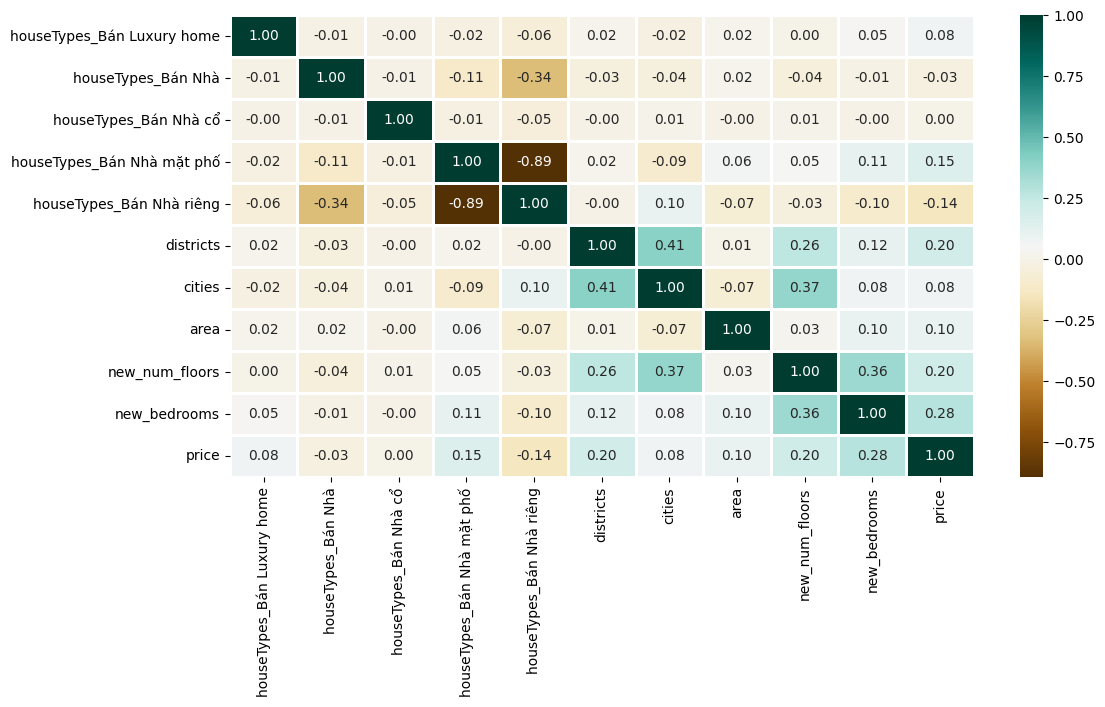

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_encoded.corr(), cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

NameError: name 'data_encoded' is not defined

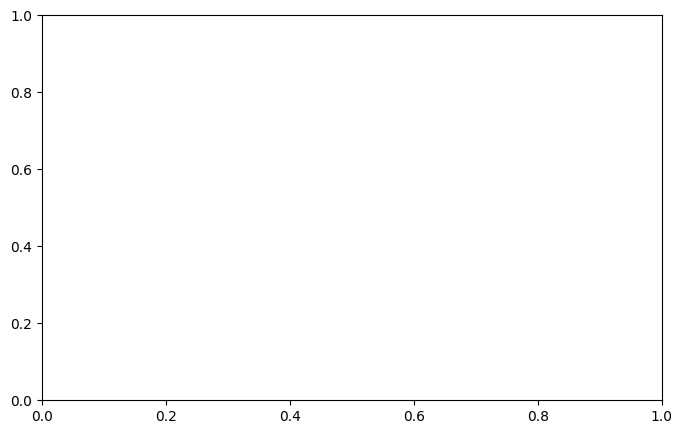

In [22]:
fig,ax = plt.subplots(figsize = (8,5))
sns.distplot(data_encoded['price'])

array([[<AxesSubplot: title={'center': 'houseTypes_Bán Luxury home'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Nhà'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Nhà cổ'}>],
       [<AxesSubplot: title={'center': 'houseTypes_Bán Nhà mặt phố'}>,
        <AxesSubplot: title={'center': 'houseTypes_Bán Nhà riêng'}>,
        <AxesSubplot: title={'center': 'districts'}>],
       [<AxesSubplot: title={'center': 'cities'}>,
        <AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'new_num_floors'}>],
       [<AxesSubplot: title={'center': 'new_bedrooms'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

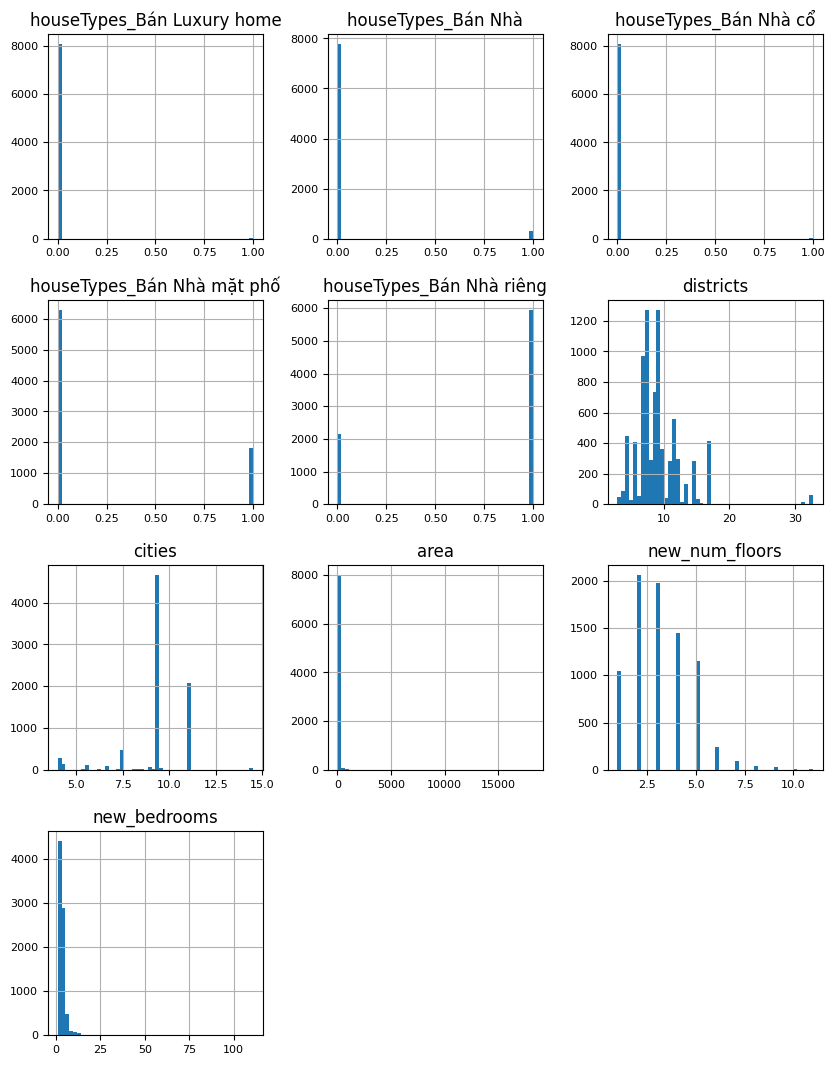

In [31]:
features = data_encoded.drop(['price'], axis=True)
features.hist(figsize=(10,13), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
df_tranform = pd.DataFrame(data = StandardScaler().fit_transform(df.loc[:, features].values), columns = features)